In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_b_label_50 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_1_50.csv')
data1_b_label_60 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_1_60.csv')
data1_b_label_70 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_1_70.csv')
data1_b_label_80 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_1_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/B/emotion_B_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/B/emotion_B_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/B/emotion_B_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/B/emotion_B_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_b_record_all_feature_50 = pd.read_csv('feature/B/data1_b_50_record_all_feature.csv')
data1_b_record_all_feature_60 = pd.read_csv('feature/B/data1_b_60_record_all_feature.csv')
data1_b_record_all_feature_70 = pd.read_csv('feature/B/data1_b_70_record_all_feature.csv')
data1_b_record_all_feature_80 = pd.read_csv('feature/B/data1_b_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/B/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/B/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/B/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/B/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_b_record_all_feature_50)
display(data1_b_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:06,2020-11-11 12:40:10,9857.046,-461.974,-2740.522,14.655,158.392,-4.912,12312.335884,6041.021324,...,9597,-705,-3549,-928,-974,-219,7.045010,37.782465,0.782779,217.400421
1,2020-11-11 12:40:07,2020-11-11 12:40:11,9902.158,-435.735,-2583.761,43.903,89.541,0.794,12551.655036,5674.472775,...,9644,-705,-3549,-928,-974,-219,7.045010,45.442450,0.782779,254.543677
2,2020-11-11 12:40:08,2020-11-11 12:40:12,9929.489,-429.422,-2485.179,43.122,107.424,-0.560,12093.203879,5856.457916,...,9644,-705,-3549,-928,-974,-219,7.045010,45.617169,0.782779,389.507954
3,2020-11-11 12:40:09,2020-11-11 12:40:13,9968.190,-412.019,-2355.205,16.598,111.766,9.525,9593.483900,7283.242639,...,9622,-710,-3300,-928,-1315,-176,6.653620,30.442844,0.391389,313.079245
4,2020-11-11 12:40:10,2020-11-11 12:40:14,9962.997,-425.525,-2369.270,114.003,-47.803,9.002,9311.536991,9327.617375,...,9622,-710,-3054,-751,-1315,-176,7.827789,26.563495,3.131115,72.919865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2020-11-11 12:54:49,2020-11-11 12:54:53,9380.835,-110.599,-4041.475,40.930,91.073,-2.528,16437.399775,4710.282199,...,9075,-335,-4499,-611,-876,-133,10.567515,12.948093,0.391389,283.076622
760,2020-11-11 12:54:50,2020-11-11 12:54:54,9429.997,-103.166,-3929.372,10.457,189.046,14.488,19970.672991,5317.376444,...,9075,-335,-4499,-922,-876,-133,4.305284,52.907536,0.782779,222.835350
761,2020-11-11 12:54:51,2020-11-11 12:54:55,9478.438,-105.549,-3815.381,76.496,20.565,13.252,19636.888156,5624.065599,...,9075,-335,-4499,-922,-876,-133,3.913894,49.733187,0.782779,194.399429
762,2020-11-11 12:54:52,2020-11-11 12:54:56,9461.289,-138.199,-3863.885,65.585,49.119,12.442,19421.721479,6713.285399,...,9075,-335,-4499,-922,-876,-109,3.522505,53.293408,0.782779,294.591425


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,5:36,5:40,0,NaN,NaN,NaN
1,5:37,5:41,0,NaN,NaN,NaN
2,5:38,5:42,0,NaN,NaN,NaN
3,5:39,5:43,0,NaN,NaN,NaN
4,5:40,5:44,0,NaN,NaN,NaN
...,...,...,...,...,...,...
759,20:19,20:23,2,NaN,NaN,NaN
760,20:20,20:24,2,NaN,NaN,NaN
761,20:21,20:25,2,NaN,NaN,NaN
762,20:22,20:26,2,NaN,NaN,NaN


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_b_label_50 = dropna(data1_b_label_50)
data1_b_label_60 = dropna(data1_b_label_60)
data1_b_label_70 = dropna(data1_b_label_70)
data1_b_label_80 = dropna(data1_b_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_b_label_50 = dropna(data1_b_label_50)
data1_b_label_60 = dropna(data1_b_label_60)
data1_b_label_70 = dropna(data1_b_label_70)
data1_b_label_80 = dropna(data1_b_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_b_label_50 = data1_b_label_50.drop(["start_time", "finish_time"], axis=1)
data1_b_label_60 = data1_b_label_60.drop(["start_time", "finish_time"], axis=1)
data1_b_label_70 = data1_b_label_70.drop(["start_time", "finish_time"], axis=1)
data1_b_label_80 = data1_b_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data1_b_label_50

,emotion_level
0,0
1,0
2,0
3,0
4,0
...,...
759,2
760,2
761,2
762,2


In [6]:
#feature_dataとemotion_labelデータを連結
data1_b_record_all_feature_50 = pd.concat([data1_b_record_all_feature_50, data1_b_label_50], axis=1, ignore_index=False)
data1_b_record_all_feature_60 = pd.concat([data1_b_record_all_feature_60, data1_b_label_60], axis=1, ignore_index=False)
data1_b_record_all_feature_70 = pd.concat([data1_b_record_all_feature_70, data1_b_label_70], axis=1, ignore_index=False)
data1_b_record_all_feature_80 = pd.concat([data1_b_record_all_feature_80, data1_b_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のBさんのデータを表示している)
display(data1_b_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:06,2020-11-11 12:40:10,9857.046,-461.974,-2740.522,14.655,158.392,-4.912,12312.335884,6041.021324,...,-705,-3549,-928,-974,-219,7.045010,37.782465,0.782779,217.400421,0
1,2020-11-11 12:40:07,2020-11-11 12:40:11,9902.158,-435.735,-2583.761,43.903,89.541,0.794,12551.655036,5674.472775,...,-705,-3549,-928,-974,-219,7.045010,45.442450,0.782779,254.543677,0
2,2020-11-11 12:40:08,2020-11-11 12:40:12,9929.489,-429.422,-2485.179,43.122,107.424,-0.560,12093.203879,5856.457916,...,-705,-3549,-928,-974,-219,7.045010,45.617169,0.782779,389.507954,0
3,2020-11-11 12:40:09,2020-11-11 12:40:13,9968.190,-412.019,-2355.205,16.598,111.766,9.525,9593.483900,7283.242639,...,-710,-3300,-928,-1315,-176,6.653620,30.442844,0.391389,313.079245,0
4,2020-11-11 12:40:10,2020-11-11 12:40:14,9962.997,-425.525,-2369.270,114.003,-47.803,9.002,9311.536991,9327.617375,...,-710,-3054,-751,-1315,-176,7.827789,26.563495,3.131115,72.919865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2020-11-11 12:54:49,2020-11-11 12:54:53,9380.835,-110.599,-4041.475,40.930,91.073,-2.528,16437.399775,4710.282199,...,-335,-4499,-611,-876,-133,10.567515,12.948093,0.391389,283.076622,2
760,2020-11-11 12:54:50,2020-11-11 12:54:54,9429.997,-103.166,-3929.372,10.457,189.046,14.488,19970.672991,5317.376444,...,-335,-4499,-922,-876,-133,4.305284,52.907536,0.782779,222.835350,2
761,2020-11-11 12:54:51,2020-11-11 12:54:55,9478.438,-105.549,-3815.381,76.496,20.565,13.252,19636.888156,5624.065599,...,-335,-4499,-922,-876,-133,3.913894,49.733187,0.782779,194.399429,2
762,2020-11-11 12:54:52,2020-11-11 12:54:56,9461.289,-138.199,-3863.885,65.585,49.119,12.442,19421.721479,6713.285399,...,-335,-4499,-922,-876,-109,3.522505,53.293408,0.782779,294.591425,2


In [7]:
data1_b_record_all_feature_70

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:06,2020-11-11 12:40:10,9857.046,-461.974,-2740.522,14.655,158.392,-4.912,12312.335884,6041.021324,...,-705,-3549,-928,-974,-219,7.045010,37.782465,0.782779,217.400421,0
1,2020-11-11 12:40:07,2020-11-11 12:40:11,9902.158,-435.735,-2583.761,43.903,89.541,0.794,12551.655036,5674.472775,...,-705,-3549,-928,-974,-219,7.045010,45.442450,0.782779,254.543677,0
2,2020-11-11 12:40:08,2020-11-11 12:40:12,9929.489,-429.422,-2485.179,43.122,107.424,-0.560,12093.203879,5856.457916,...,-705,-3549,-928,-974,-219,7.045010,45.617169,0.782779,389.507954,0
3,2020-11-11 12:40:09,2020-11-11 12:40:13,9968.190,-412.019,-2355.205,16.598,111.766,9.525,9593.483900,7283.242639,...,-710,-3300,-928,-1315,-176,6.653620,30.442844,0.391389,313.079245,0
4,2020-11-11 12:40:10,2020-11-11 12:40:14,9962.997,-425.525,-2369.270,114.003,-47.803,9.002,9311.536991,9327.617375,...,-710,-3054,-751,-1315,-176,7.827789,26.563495,3.131115,72.919865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2020-11-11 12:54:49,2020-11-11 12:54:53,9380.835,-110.599,-4041.475,40.930,91.073,-2.528,16437.399775,4710.282199,...,-335,-4499,-611,-876,-133,10.567515,12.948093,0.391389,283.076622,2
736,2020-11-11 12:54:50,2020-11-11 12:54:54,9429.997,-103.166,-3929.372,10.457,189.046,14.488,19970.672991,5317.376444,...,-335,-4499,-922,-876,-133,4.305284,52.907536,0.782779,222.835350,2
737,2020-11-11 12:54:51,2020-11-11 12:54:55,9478.438,-105.549,-3815.381,76.496,20.565,13.252,19636.888156,5624.065599,...,-335,-4499,-922,-876,-133,3.913894,49.733187,0.782779,194.399429,2
738,2020-11-11 12:54:52,2020-11-11 12:54:56,9461.289,-138.199,-3863.885,65.585,49.119,12.442,19421.721479,6713.285399,...,-335,-4499,-922,-876,-109,3.522505,53.293408,0.782779,294.591425,2


In [8]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data1_b_50_record_all_feature_1 = data1_b_record_all_feature_50.iloc[0:254]
data1_b_50_record_all_feature_2 = data1_b_record_all_feature_50.iloc[254:508]
data1_b_50_record_all_feature_3 = data1_b_record_all_feature_50.iloc[508:764]

data1_b_60_record_all_feature_1 = data1_b_record_all_feature_60.iloc[0:250]
data1_b_60_record_all_feature_2 = data1_b_record_all_feature_60.iloc[250:500]
data1_b_60_record_all_feature_3 = data1_b_record_all_feature_60.iloc[500:750]

data1_b_70_record_all_feature_1 = data1_b_record_all_feature_70.iloc[0:240]
data1_b_70_record_all_feature_2 = data1_b_record_all_feature_70.iloc[240:480]
data1_b_70_record_all_feature_3 = data1_b_record_all_feature_70.iloc[480:740]

data1_b_80_record_all_feature_1 = data1_b_record_all_feature_80.iloc[0:241]
data1_b_80_record_all_feature_2 = data1_b_record_all_feature_80.iloc[241:482]
data1_b_80_record_all_feature_3 = data1_b_record_all_feature_80.iloc[482:723]


# data1_b_50_record_all_feature_1 = data1_b_record_all_feature_50.iloc[0:150]
# data1_b_50_record_all_feature_2 = data1_b_record_all_feature_50.iloc[150:300]
# data1_b_50_record_all_feature_3 = data1_b_record_all_feature_50.iloc[300:470]

# data1_b_60_record_all_feature_1 = data1_b_record_all_feature_60.iloc[0:150]
# data1_b_60_record_all_feature_2 = data1_b_record_all_feature_60.iloc[150:300]
# data1_b_60_record_all_feature_3 = data1_b_record_all_feature_60.iloc[300:470]

# data1_b_70_record_all_feature_1 = data1_b_record_all_feature_70.iloc[0:150]
# data1_b_70_record_all_feature_2 = data1_b_record_all_feature_70.iloc[150:300]
# data1_b_70_record_all_feature_3 = data1_b_record_all_feature_70.iloc[300:470]

# data1_b_80_record_all_feature_1 = data1_b_record_all_feature_80.iloc[0:150]
# data1_b_80_record_all_feature_2 = data1_b_record_all_feature_80.iloc[150:300]
# data1_b_80_record_all_feature_3 = data1_b_record_all_feature_80.iloc[300:470]

In [9]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [10]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_b_50_record_all_feature_1 = emotion_level_define(data1_b_50_record_all_feature_1)
data1_b_50_record_all_feature_2 = emotion_level_define(data1_b_50_record_all_feature_2)
data1_b_50_record_all_feature_3 = emotion_level_define(data1_b_50_record_all_feature_3)

data1_b_60_record_all_feature_1 = emotion_level_define(data1_b_60_record_all_feature_1)
data1_b_60_record_all_feature_2 = emotion_level_define(data1_b_60_record_all_feature_2)
data1_b_60_record_all_feature_3 = emotion_level_define(data1_b_60_record_all_feature_3)

data1_b_70_record_all_feature_1 = emotion_level_define(data1_b_70_record_all_feature_1)
data1_b_70_record_all_feature_2 = emotion_level_define(data1_b_70_record_all_feature_2)
data1_b_70_record_all_feature_3 = emotion_level_define(data1_b_70_record_all_feature_3)

data1_b_80_record_all_feature_1 = emotion_level_define(data1_b_80_record_all_feature_1)
data1_b_80_record_all_feature_2 = emotion_level_define(data1_b_80_record_all_feature_2)
data1_b_80_record_all_feature_3 = emotion_level_define(data1_b_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_b_50_record_all_feature_1 = emotion_level_drop(data1_b_50_record_all_feature_1)
data1_b_50_record_all_feature_2 = emotion_level_drop(data1_b_50_record_all_feature_2)
data1_b_50_record_all_feature_3 = emotion_level_drop(data1_b_50_record_all_feature_3)

data1_b_60_record_all_feature_1 = emotion_level_drop(data1_b_60_record_all_feature_1)
data1_b_60_record_all_feature_2 = emotion_level_drop(data1_b_60_record_all_feature_2)
data1_b_60_record_all_feature_3 = emotion_level_drop(data1_b_60_record_all_feature_3)

data1_b_70_record_all_feature_1 = emotion_level_drop(data1_b_70_record_all_feature_1)
data1_b_70_record_all_feature_2 = emotion_level_drop(data1_b_70_record_all_feature_2)
data1_b_70_record_all_feature_3 = emotion_level_drop(data1_b_70_record_all_feature_3)

data1_b_80_record_all_feature_1 = emotion_level_drop(data1_b_80_record_all_feature_1)
data1_b_80_record_all_feature_2 = emotion_level_drop(data1_b_80_record_all_feature_2)
data1_b_80_record_all_feature_3 = emotion_level_drop(data1_b_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
data1_b_70_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:06,2020-11-11 12:40:10,9857.046,-461.974,-2740.522,14.655,158.392,-4.912,12312.335884,6041.021324,...,-705,-3549,-928,-974,-219,7.045010,37.782465,0.782779,217.400421,other
1,2020-11-11 12:40:07,2020-11-11 12:40:11,9902.158,-435.735,-2583.761,43.903,89.541,0.794,12551.655036,5674.472775,...,-705,-3549,-928,-974,-219,7.045010,45.442450,0.782779,254.543677,other
2,2020-11-11 12:40:08,2020-11-11 12:40:12,9929.489,-429.422,-2485.179,43.122,107.424,-0.560,12093.203879,5856.457916,...,-705,-3549,-928,-974,-219,7.045010,45.617169,0.782779,389.507954,other
3,2020-11-11 12:40:09,2020-11-11 12:40:13,9968.190,-412.019,-2355.205,16.598,111.766,9.525,9593.483900,7283.242639,...,-710,-3300,-928,-1315,-176,6.653620,30.442844,0.391389,313.079245,other
4,2020-11-11 12:40:10,2020-11-11 12:40:14,9962.997,-425.525,-2369.270,114.003,-47.803,9.002,9311.536991,9327.617375,...,-710,-3054,-751,-1315,-176,7.827789,26.563495,3.131115,72.919865,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020-11-11 12:44:56,2020-11-11 12:45:00,9767.905,-555.051,-3032.550,85.415,-45.308,0.294,9915.685975,2614.878399,...,-720,-3593,-392,-834,-249,7.827789,37.418883,0.391389,122.386442,other
236,2020-11-11 12:44:57,2020-11-11 12:45:01,9744.978,-571.389,-3104.787,53.000,96.786,7.894,9827.809516,1789.679679,...,-720,-3666,-392,-730,-231,5.479452,32.583381,0.391389,279.346151,other
237,2020-11-11 12:44:58,2020-11-11 12:45:02,9777.939,-571.877,-2997.376,57.636,92.683,1.217,10386.181279,1486.309871,...,-696,-3666,-392,-638,-231,11.741683,26.458215,0.782779,228.292049,other
238,2020-11-11 12:44:59,2020-11-11 12:45:03,9797.950,-570.080,-2939.033,57.761,66.763,-1.346,12871.753500,3177.657600,...,-896,-3779,-648,-1584,-274,11.741683,27.030609,0.782779,181.869075,other


In [13]:
#全データからpositiveの数を確認
data1_b_50_record_all_feature_positive_1 = data1_b_50_record_all_feature_1[data1_b_50_record_all_feature_1.label == "positive"]
data1_b_50_record_all_feature_positive_1 = data1_b_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_positive_1))

data1_b_50_record_all_feature_positive_2 = data1_b_50_record_all_feature_2[data1_b_50_record_all_feature_2.label == "positive"]
data1_b_50_record_all_feature_positive_2 = data1_b_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_positive_2))

data1_b_50_record_all_feature_positive_3 = data1_b_50_record_all_feature_3[data1_b_50_record_all_feature_3.label == "positive"]
data1_b_50_record_all_feature_positive_3 = data1_b_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_positive_3))

data1_b_60_record_all_feature_positive_1 = data1_b_60_record_all_feature_1[data1_b_60_record_all_feature_1.label == "positive"]
data1_b_60_record_all_feature_positive_1 = data1_b_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_positive_1))

data1_b_60_record_all_feature_positive_2 = data1_b_60_record_all_feature_2[data1_b_60_record_all_feature_2.label == "positive"]
data1_b_60_record_all_feature_positive_2 = data1_b_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_positive_2))

data1_b_60_record_all_feature_positive_3 = data1_b_60_record_all_feature_3[data1_b_60_record_all_feature_3.label == "positive"]
data1_b_60_record_all_feature_positive_3 = data1_b_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_positive_3))

data1_b_70_record_all_feature_positive_1 = data1_b_70_record_all_feature_1[data1_b_70_record_all_feature_1.label == "positive"]
data1_b_670_record_all_feature_positive_1 = data1_b_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_positive_1))

data1_b_70_record_all_feature_positive_2 = data1_b_70_record_all_feature_2[data1_b_70_record_all_feature_2.label == "positive"]
data1_b_70_record_all_feature_positive_2 = data1_b_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_positive_2))

data1_b_70_record_all_feature_positive_3 = data1_b_70_record_all_feature_3[data1_b_70_record_all_feature_3.label == "positive"]
data1_b_70_record_all_feature_positive_3 = data1_b_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_positive_3))

data1_b_80_record_all_feature_positive_1 = data1_b_80_record_all_feature_1[data1_b_80_record_all_feature_1.label == "positive"]
data1_b_80_record_all_feature_positive_1 = data1_b_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_positive_1))

data1_b_80_record_all_feature_positive_2 = data1_b_80_record_all_feature_2[data1_b_80_record_all_feature_2.label == "positive"]
data1_b_80_record_all_feature_positive_2 = data1_b_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_positive_2))

data1_b_80_record_all_feature_positive_3 = data1_b_80_record_all_feature_3[data1_b_80_record_all_feature_3.label == "positive"]
data1_b_80_record_all_feature_positive_3 = data1_b_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_positive_3))

89
75
55
86
74
54
84
73
54
81
72
53


In [14]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [15]:
# #全データからotherの数を確認
data1_b_50_record_all_feature_other_1 = data1_b_50_record_all_feature_1[data1_b_50_record_all_feature_1.label == "other"]
data1_b_50_record_all_feature_other_1 = data1_b_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_other_1))

data1_b_50_record_all_feature_other_2 = data1_b_50_record_all_feature_2[data1_b_50_record_all_feature_2.label == "other"]
data1_b_50_record_all_feature_other_2 = data1_b_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_other_2))

data1_b_50_record_all_feature_other_3 = data1_b_50_record_all_feature_3[data1_b_50_record_all_feature_3.label == "other"]
data1_b_50_record_all_feature_other_3 = data1_b_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_b_50_record_all_feature_other_3))

data1_b_60_record_all_feature_other_2 = data1_b_60_record_all_feature_2[data1_b_60_record_all_feature_2.label == "other"]
data1_b_60_record_all_feature_other_2 = data1_b_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_other_2))

data1_b_60_record_all_feature_other_3 = data1_b_60_record_all_feature_3[data1_b_60_record_all_feature_3.label == "other"]
data1_b_60_record_all_feature_other_3 = data1_b_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_other_3))

data1_b_60_record_all_feature_other_1 = data1_b_60_record_all_feature_1[data1_b_60_record_all_feature_1.label == "other"]
data1_b_60_record_all_feature_other_1 = data1_b_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_b_60_record_all_feature_other_1))

data1_b_70_record_all_feature_other_2 = data1_b_70_record_all_feature_2[data1_b_70_record_all_feature_2.label == "other"]
data1_b_70_record_all_feature_other_2 = data1_b_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_other_2))

data1_b_70_record_all_feature_other_3 = data1_b_70_record_all_feature_3[data1_b_70_record_all_feature_3.label == "other"]
data1_b_70_record_all_feature_other_3 = data1_b_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_other_3))

data1_b_70_record_all_feature_other_1 = data1_b_70_record_all_feature_1[data1_b_70_record_all_feature_1.label == "other"]
data1_b_70_record_all_feature_other_1 = data1_b_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_b_70_record_all_feature_other_1))

data1_b_80_record_all_feature_other_2 = data1_b_80_record_all_feature_2[data1_b_80_record_all_feature_2.label == "other"]
data1_b_80_record_all_feature_other_2 = data1_b_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_other_2))

data1_b_80_record_all_feature_other_3 = data1_b_80_record_all_feature_3[data1_b_80_record_all_feature_3.label == "other"]
data1_b_80_record_all_feature_other_3 = data1_b_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_other_3))

data1_b_80_record_all_feature_other_3 = data1_b_80_record_all_feature_3[data1_b_80_record_all_feature_3.label == "other"]
data1_b_80_record_all_feature_other_3 = data1_b_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_b_80_record_all_feature_other_3))

165
179
201
176
196
164
167
206
156
169
188
188


In [16]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [17]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_b_70_record_all_feature_1, data1_b_70_record_all_feature_2], ignore_index=True)
test_data = data1_b_70_record_all_feature_3

In [18]:
train_data.columns

Index(['start_time', 'finish_time', 'accx_mean', 'accy_mean', 'accz_mean',
       'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'accx_var', 'accy_var',
       'accz_var', 'gyrx_var', 'gyry_var', 'gyrz_var', 'accx_max', 'accy_max',
       'accz_max', 'gyrx_max', 'gyry_max', 'gyrz_max', 'accx_min', 'accy_min',
       'accz_min', 'gyrx_min', 'gyry_min', 'gyrz_min', 'accn_max_fq',
       'accn_max_peak', 'gyrn_max_fq', 'gyrn_max_peak', 'label'],
      dtype='object')

In [19]:
train_data = train_data[['start_time', 'finish_time','gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var','gyrx_max', 'gyry_max', 'gyrz_max','gyrx_min', 'gyry_min', 'gyrz_min','gyrn_max_fq', 'gyrn_max_peak','label']]

In [20]:
train_data.iloc[0:,2:16]

,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak
0,14.655,158.392,-4.912,86331.813975,171400.244336,2428.920256,1120,1556,213,-928,-974,-219,0.782779,217.400421
1,43.903,89.541,0.794,74971.001591,140219.848319,2294.277564,1120,1556,213,-928,-974,-219,0.782779,254.543677
2,43.122,107.424,-0.560,73191.513116,129230.736224,2213.166400,1120,1556,213,-928,-974,-219,0.782779,389.507954
3,16.598,111.766,9.525,55984.502396,137851.871244,3259.373375,857,1556,359,-928,-1315,-176,0.391389,313.079245
4,114.003,-47.803,9.002,36174.766991,74632.208191,3466.623996,857,854,359,-751,-1315,-176,3.131115,72.919865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-46.882,190.075,16.286,329721.396076,930144.491375,19927.156204,1870,2848,835,-1904,-5145,-512,0.391389,466.140005
476,-87.099,294.998,-1.286,341997.967199,654681.413996,13450.666204,2248,2848,439,-1904,-2340,-512,0.391389,374.528080
477,-114.304,386.265,11.060,356814.953584,556151.252775,7218.334400,2248,2848,512,-2044,-1901,-219,0.391389,823.733904
478,-115.505,348.000,25.831,394083.799975,641564.844000,20452.744439,2248,2873,622,-2044,-1901,-408,0.782779,786.819913


In [21]:
X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [22]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.7923076923076923
誤った個数：54
classification report
              precision    recall  f1-score   support

       other       0.79      1.00      0.88       206
    positive       0.00      0.00      0.00        54

    accuracy                           0.79       260
   macro avg       0.40      0.50      0.44       260
weighted avg       0.63      0.79      0.70       260

Confusion matrix, without normalization
[[206   0]
 [ 54   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


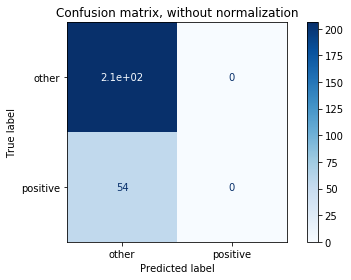

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


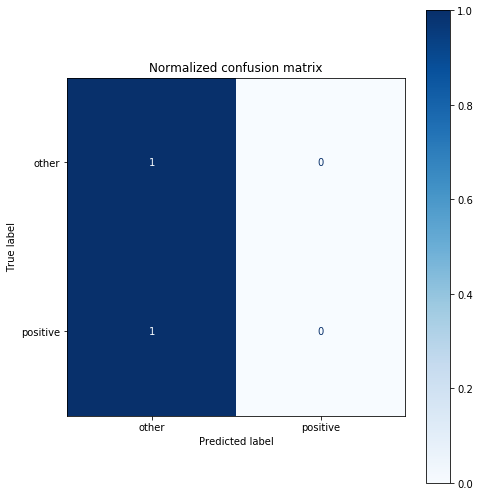

In [23]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [24]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_b_record_all_feature_50.iloc[0:480]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_b_record_all_feature_50.iloc[480:740]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_b_record_all_feature_50.iloc[480:740]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:47,2020-11-11 12:49:51,other,0.0
1,2020-11-11 12:49:48,2020-11-11 12:49:52,other,0.0
2,2020-11-11 12:49:49,2020-11-11 12:49:53,other,0.0
3,2020-11-11 12:49:50,2020-11-11 12:49:54,other,0.0
4,2020-11-11 12:49:51,2020-11-11 12:49:55,other,0.0
...,...,...,...,...
255,2020-11-11 12:54:25,2020-11-11 12:54:29,other,0.0
256,2020-11-11 12:54:26,2020-11-11 12:54:30,other,0.0
257,2020-11-11 12:54:27,2020-11-11 12:54:31,other,0.0
258,2020-11-11 12:54:28,2020-11-11 12:54:32,other,0.0


In [25]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:47,2020-11-11 12:49:51,other,0.0
1,2020-11-11 12:49:48,2020-11-11 12:49:52,other,0.0
2,2020-11-11 12:49:49,2020-11-11 12:49:53,other,0.0
3,2020-11-11 12:49:50,2020-11-11 12:49:54,other,0.0
4,2020-11-11 12:49:51,2020-11-11 12:49:55,other,0.0
...,...,...,...,...
255,2020-11-11 12:54:25,2020-11-11 12:54:29,other,0.0
256,2020-11-11 12:54:26,2020-11-11 12:54:30,other,0.0
257,2020-11-11 12:54:27,2020-11-11 12:54:31,other,0.0
258,2020-11-11 12:54:28,2020-11-11 12:54:32,other,0.0


In [26]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [27]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [28]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:40:06,2020-11-11 12:40:10,other,0.0
2020-11-11 12:40:07,2020-11-11 12:40:11,other,0.0
2020-11-11 12:40:08,2020-11-11 12:40:12,other,0.0
2020-11-11 12:40:09,2020-11-11 12:40:13,other,0.0
2020-11-11 12:40:10,2020-11-11 12:40:14,other,0.0
...,...,...,...
2020-11-11 12:54:25,2020-11-11 12:54:29,other,0.0
2020-11-11 12:54:26,2020-11-11 12:54:30,other,0.0
2020-11-11 12:54:27,2020-11-11 12:54:31,other,0.0


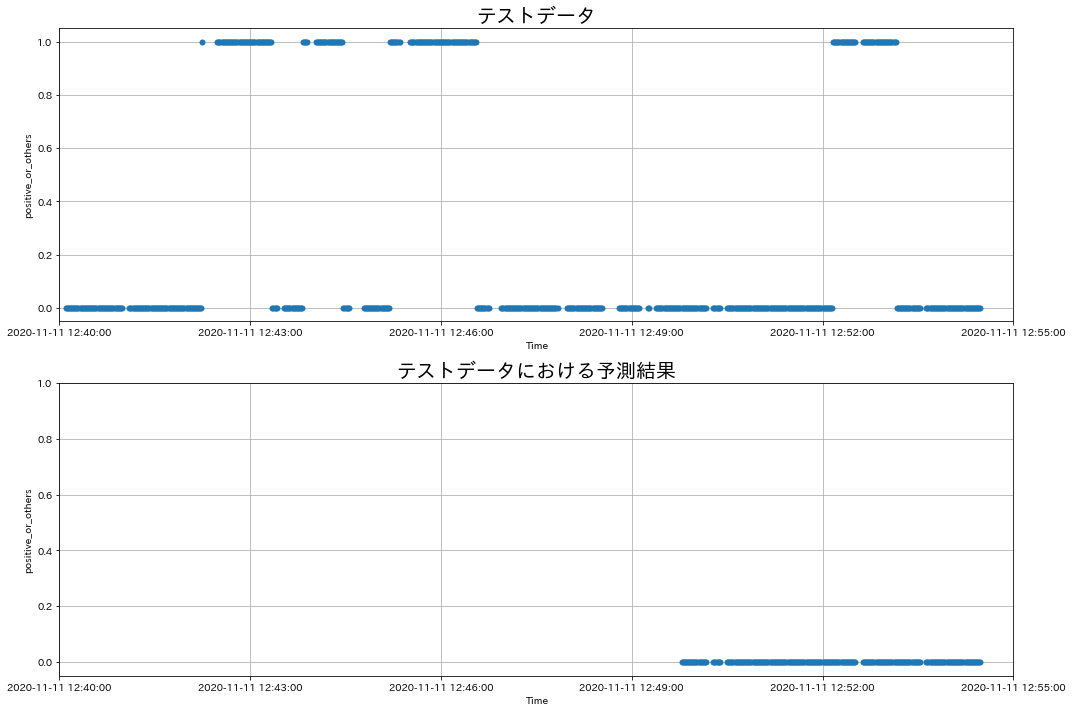

In [29]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.set_ylim(-0.05,1)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()